In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
        ... 
44.5       1
55.9       1
55.5       1
93.5       1
62.3       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [6]:
pr.poverty_rate.replace(['-'], 0.0, inplace = True)

In [7]:
pr.poverty_rate.value_counts()

0       1464
0.0      201
7.4      129
6.7      129
10       128
        ... 
44.5       1
55.9       1
55.5       1
93.5       1
62.3       1
Name: poverty_rate, Length: 771, dtype: int64

In [8]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [9]:
pr.poverty_rate = pr.poverty_rate.astype("float")
# pr.poverty_rate = pd.to_numeric(poverty_rate)

In [10]:
pr.poverty_rate.dtype

dtype('float64')

In [11]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

In [26]:
pr = pr.rename(columns = {"Geographic Area":  "Geographic_Area"})

In [27]:
pr.head()

,Geographic_Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [28]:
poverty_rates = pr.groupby("Geographic_Area").poverty_rate.mean().reset_index()
# poverty_rates = pr.groupby("Geographic_Area", as_index=False).poverty_rate.mean()

In [35]:
poverty_rates.head()

,Geographic_Area,poverty_rate
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


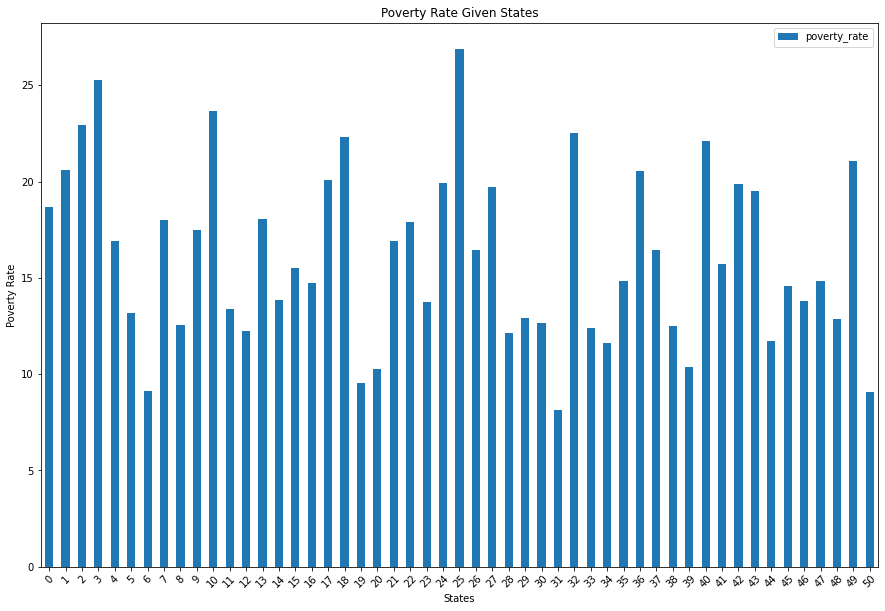

In [36]:
poverty_rates.plot.bar(xlabel = "States", 
                       ylabel = "Poverty Rate", 
                       title = "Poverty Rate Given States", 
                       figsize=(15,10), 
                       rot = 45)
plt.show()

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [37]:
# pr_meanDF = pd.DataFrame(poverty_rates)
# pr_meanDF_sorted = pr_meanDF.sort_values(by = "poverty_rate", ascending=False)

In [38]:
pr_mean_sorted = pr_mean.sort_values(by = "poverty_rate", ascending=False)

In [39]:
pr_mean_sorted.head()

,Geographic_Area,poverty_rate
25,MS,26.884254
3,AZ,25.268071
10,GA,23.663636
2,AR,22.963216
32,NM,22.507675


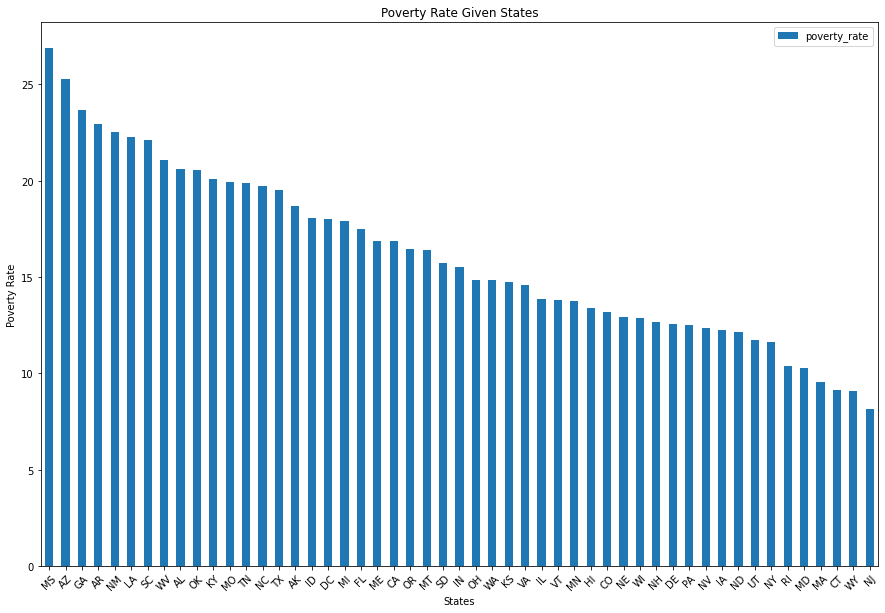

In [41]:
pr_mean_sorted.plot.bar(x = "Geographic_Area", 
                        xlabel = "States", 
                        ylabel = "Poverty Rate", 
                        title = "Poverty Rate Given States", 
                        figsize=(15,10), 
                        rot = 45)
plt.show()

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [42]:
pr_mean_sorted.head()

,Geographic_Area,poverty_rate
25,MS,26.884254
3,AZ,25.268071
10,GA,23.663636
2,AR,22.963216
32,NM,22.507675


Text(0.5, 1.0, 'Poverty Rate Given States')

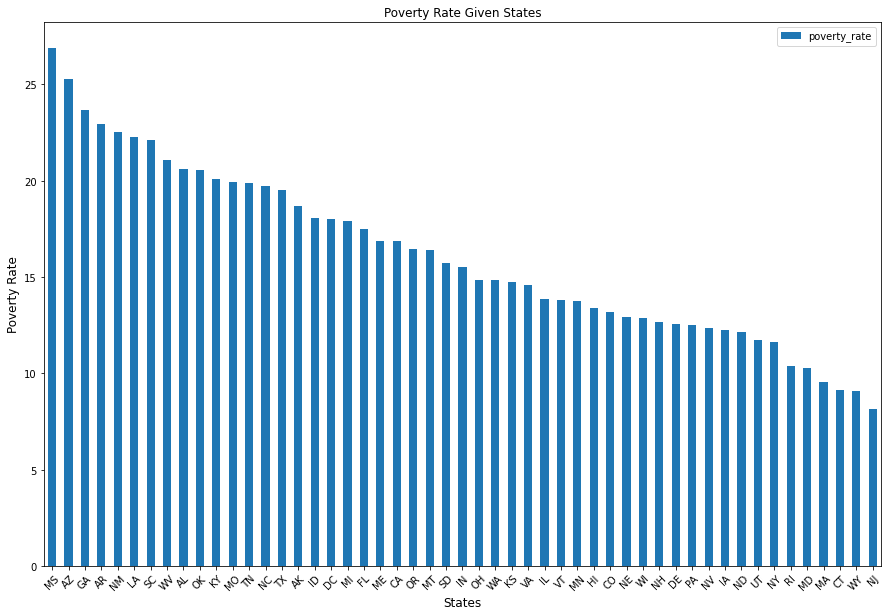

In [43]:
pr_mean_sorted.plot.bar(x = "Geographic_Area", figsize =(15,10), rot = 45)
plt.ylabel("Poverty Rate", fontsize = 12)
plt.xlabel("States", fontsize = 12)
plt.title("Poverty Rate Given States")


**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

In [386]:
pr_mean_sorted.head()

,Geographic_Area,poverty_rate
25,MS,26.884254
3,AZ,25.268071
10,GA,23.663636
2,AR,22.963216
32,NM,22.507675


In [387]:
pr_mean_sorted.index

Int64Index([25,  3, 10,  2, 32, 18, 40, 49,  1, 36, 17, 24, 42, 27, 43,  0, 13,
             7, 22,  9, 21,  4, 37, 26, 41, 15, 35, 47, 16, 45, 14, 46, 23, 11,
             5, 29, 48, 30,  8, 38, 33, 12, 28, 44, 34, 39, 20, 19,  6, 50,
            31],
           dtype='int64')

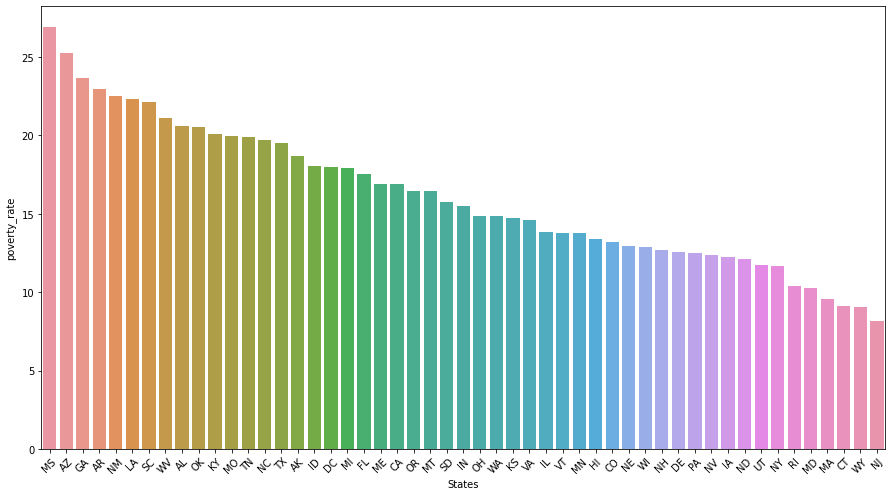

In [44]:
fig = plt.figure(figsize=(12.5,7))
ax = sns.barplot(x = "Geographic_Area" , y="poverty_rate", data = pr_mean_sorted)
ax.set(xlabel="States", ylabel="poverty_rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Most common 15 Name or Surname of killed people 

In [50]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [51]:
kill.name.value_counts()

TK TK                       49
TK Tk                        2
Brandon Jones                2
Michael Johnson              2
Daquan Antonio Westbrook     2
                            ..
Richard Love                 1
Schuylar Gunning             1
Steven Dodd                  1
Johnathan Lozano-Murillo     1
JR Williams                  1
Name: name, Length: 2481, dtype: int64

In [52]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[(kill.name != 'TK TK') & (kill.name != "TK Tk")].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [53]:
names, surnames = zip(*pairs)

In [54]:
names

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [55]:
surnames

('Elliot',
 'Lee',
 'Paul',
 'Hoffman',
 'Rodriguez',
 'Joe',
 'Arnold',
 'Nichols',
 'Steele',
 'Sapp',
 'Wetter',
 'Sneed',
 'Hanif',
 'Ryan',
 'Julian',
 'Simpson',
 'Dudley',
 'Damon',
 'Hamby',
 'Foreman',
 'Martinez',
 'Smith',
 'Barbosa',
 'Figueroa',
 'Edward',
 'McClendon',
 'Golden',
 'Goebel',
 'Jordan',
 'Schroeder',
 'Edwards',
 'R.',
 'Sowell',
 'Earl',
 'Reed',
 'Ceja',
 'Massey',
 'Hall',
 'Shinwary',
 'Walker',
 'Meza',
 'Brumley',
 'Guillory',
 'Castle',
 'Campbell',
 'Carr',
 'Allen',
 'Angel',
 'Holmes',
 'Toto',
 'Meton',
 'Coignard',
 'Francis',
 'Turner',
 'Antonio',
 'King',
 'Myler',
 'Hutchins',
 'Jude',
 'Campbell',
 'Hernandez',
 'Kmetz',
 'Omar',
 'Garcia',
 'Leland',
 'Ingram',
 'Fletcher',
 'Terry',
 'Lance',
 'Nuu',
 'Karasek',
 'Willis',
 'James',
 'Barry',
 'Manuel',
 'Donnell',
 'Haglund',
 'Kassick',
 'Murphy',
 'D.',
 'Henderson',
 'Deshawn',
 'Purvis',
 'Lett',
 'Colon',
 'Muna',
 'Hernandez',
 'Ray',
 'Atkins',
 'Alfred',
 'Hill',
 'Sawyer',
 'All

In [56]:
ns = names + surnames

In [57]:
ns

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [58]:
nsCounter = Counter(ns)

In [59]:
nsMC = nsCounter.most_common(15)

In [60]:
nsMC

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [61]:
df = pd.DataFrame(nsMC, columns = (["repeated","counted"]))

In [62]:
df

,repeated,counted
0,Michael,91
1,David,57
2,James,56
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,37


In [63]:
df.iterrows()

<generator object DataFrame.iterrows at 0x000002464B3A7890>

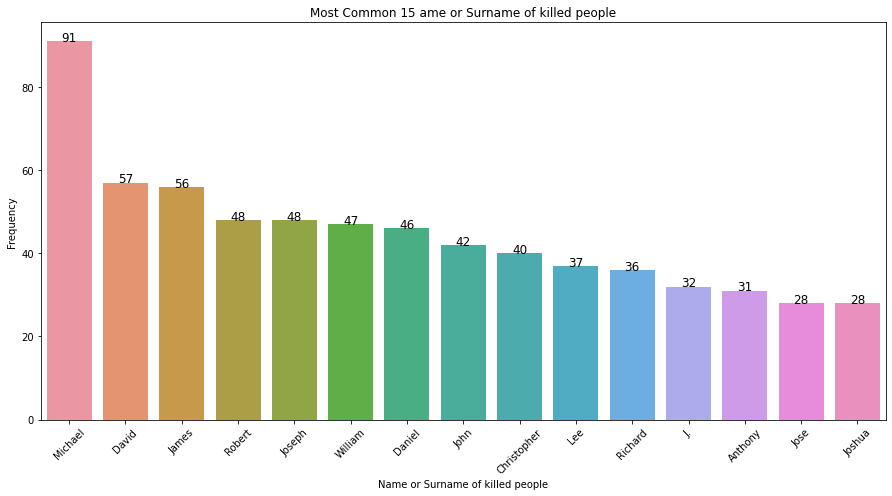

In [64]:
fig = plt.figure(figsize=(12.5,7))
ax = sns.barplot(x = "repeated", y = "counted", data = df)
ax.set(xlabel="Name or Surname of killed people", ylabel = "Frequency", title = "Most Common 15 ame or Surname of killed people")
plt.xticks(rotation=45)

for index, row in df.iterrows():
    ax.text(row.name,row.counted, round(row.counted,1), color='black', ha="center", fontsize=12)

plt.tight_layout()
plt.show()

## 3. Killed People According to Races (Pie Chart)

In [65]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [66]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [67]:
kill.race.value_counts(dropna = False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [68]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [69]:
kill.dropna(subset = ["race"], inplace = True)

In [70]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2340 non-null   int64  
 1   name                     2340 non-null   object 
 2   date                     2340 non-null   object 
 3   manner_of_death          2340 non-null   object 
 4   armed                    2334 non-null   object 
 5   age                      2311 non-null   float64
 6   gender                   2340 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2340 non-null   object 
 9   state                    2340 non-null   object 
 10  signs_of_mental_illness  2340 non-null   bool   
 11  threat_level             2340 non-null   object 
 12  flee                     2288 non-null   object 
 13  body_camera              2340 non-null   bool   
dtypes: bool(2), float64(1), 

In [71]:
kill.race.value_counts(dropna = False)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [87]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [88]:
kill_race_df = kill.race.value_counts().to_frame().reset_index()
# kill_race_df = kill.race.value_counts().to_frame().reset_index()

In [89]:
kill_race_df

,index,race
0,W,1201
1,B,618
2,H,423
3,A,39
4,N,31
5,O,28


In [90]:
kill_race_df.index

RangeIndex(start=0, stop=6, step=1)

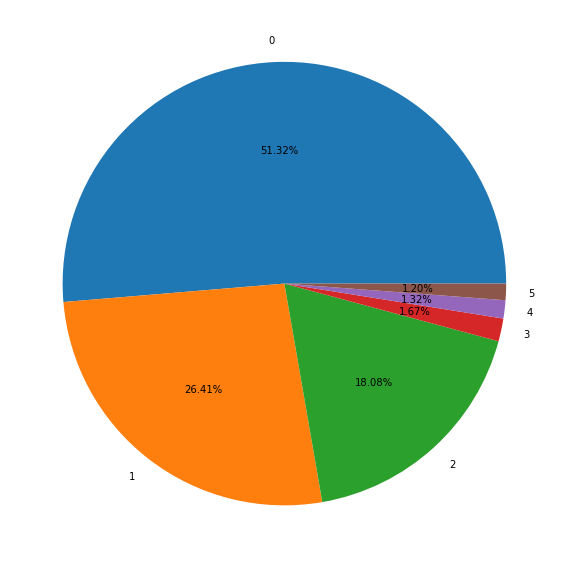

In [91]:
fig, ax = plt.subplots(figsize = (13,8))
ax.pie(kill_race_df.race, labels= kill_race_df.index, autopct='%1.2f%%')
# ax.axis('equal')
plt.tight_layout()
plt.show()

## 4a.Box plot of age in both genders separeted by manner of death.

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [92]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

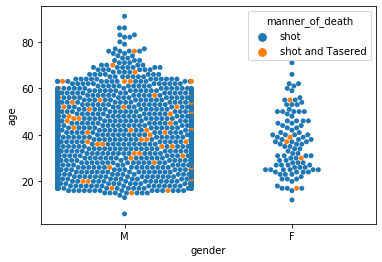

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

Text(0.5, 1.0, 'gender')

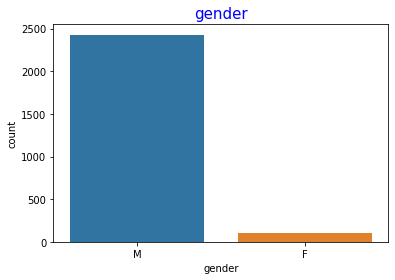

**INSTRUCTION-2: Plot 7 most common kill weapons**

Text(0.5, 1.0, 'Kill weapon')

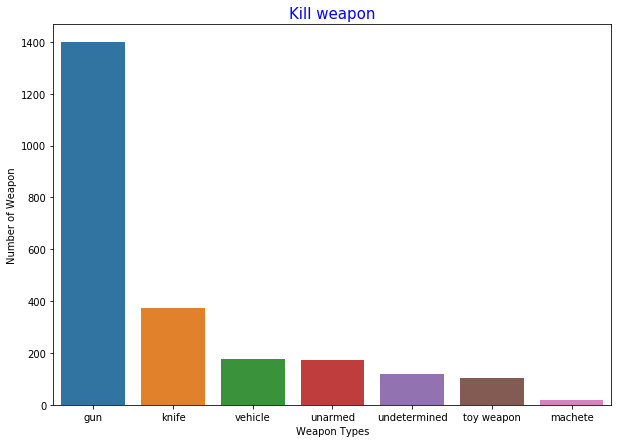

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

Text(0.5, 1.0, 'Age of killed people')

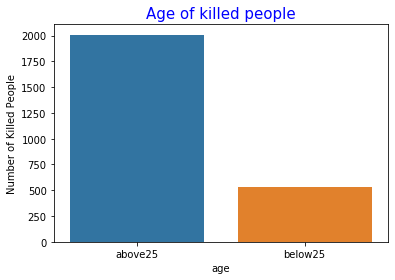

**INSTRUCTION-4: Plot number of killed poeple by race**

Text(0.5, 1.0, 'Race of killed people')

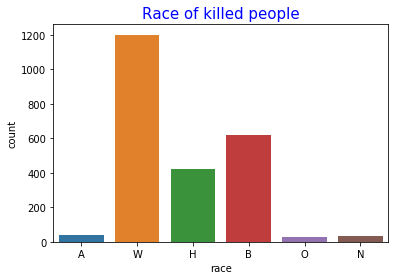

**INSTRUCTION-5: Plot 12 most dangerous cities**

Text(0.5, 1.0, 'Most dangerous cities')

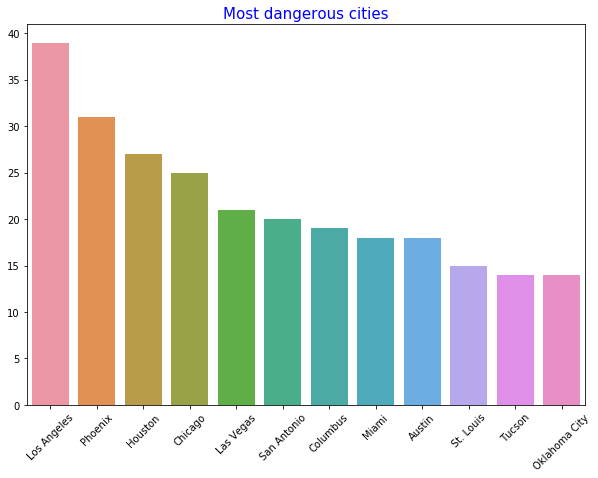

**INSTRUCTION-6: Plot 20 most dangerous states**

Text(0.5, 1.0, 'Most dangerous state')

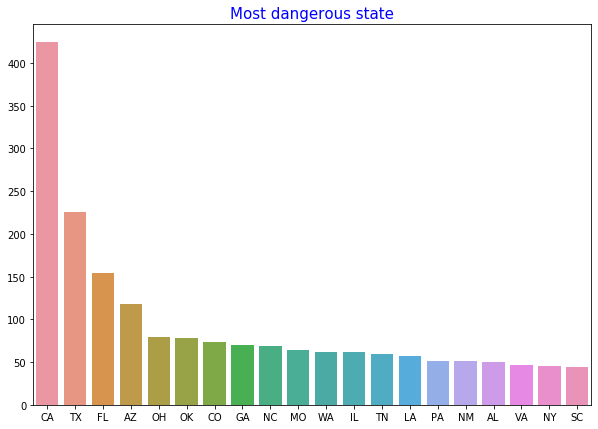

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

Text(0.5, 1.0, 'Having mental illness or not')

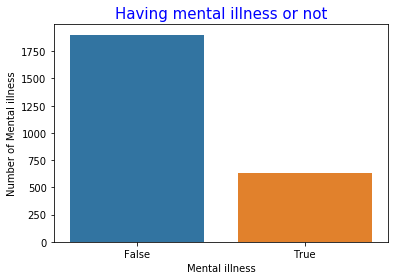

**INSTRUCTION-8: Plot number of Threat Types**

Text(0.5, 1.0, 'Threat types')

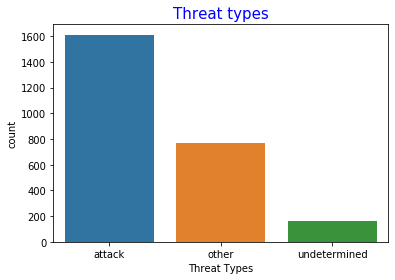

**INSTRUCTION-9: Plot number of Flee Types**

Text(0.5, 1.0, 'Flee types')

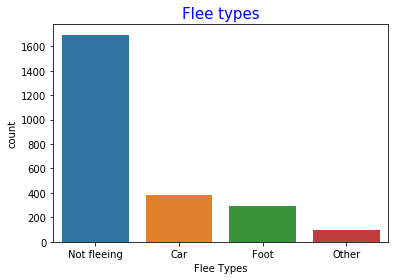